In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Automerge

In [3]:
swift_times = pd.read_csv("opt-swift-automerge.txt", header = None)

# these values are time for swift to run in nanoseconds when we add another point. 
# so the first element is the time taken to add the first point and the last element 
# is the time to add the 1000th point. it's not cumulative.

swift = swift_times.transpose()
swift = swift.rename(columns = {0 : 'Time'})

# Convert to milliseconds to match other file
conversion = 0.0000010
swift['Time'] = swift['Time'].apply(lambda x: x * conversion)

def accumulate(df):
    cumulative = np.zeros(df.count())
    summed = 0
    for (index, row) in df.iterrows():
        summed += df.iloc[index]['Time']
        cumulative[index] = summed
    return cumulative
        
summed = accumulate(swift)
swift['Cumulative'] = summed

swift.head()

,Time,Cumulative
0,87.490485,87.490485
1,30.993843,118.484328
2,35.120957,153.605285
3,73.449933,227.055218
4,189.182291,416.237509


In [4]:
js_times = pd.read_csv("opt-js-automerge.txt", header = None)

# these values are time for javascript to run in Milliseconds when we add another point. 
# so the first element is the time taken to add the first point and the last element is the time 
# to add the 1000th point. it's not cumulative.           

javascript = js_times.transpose()
javascript = javascript.rename(columns = {0 : 'Time'})

summed = accumulate(javascript)
javascript['Cumulative'] = summed

javascript.head()

,Time,Cumulative
0,60,60.0
1,13,73.0
2,20,93.0
3,157,250.0
4,13,263.0


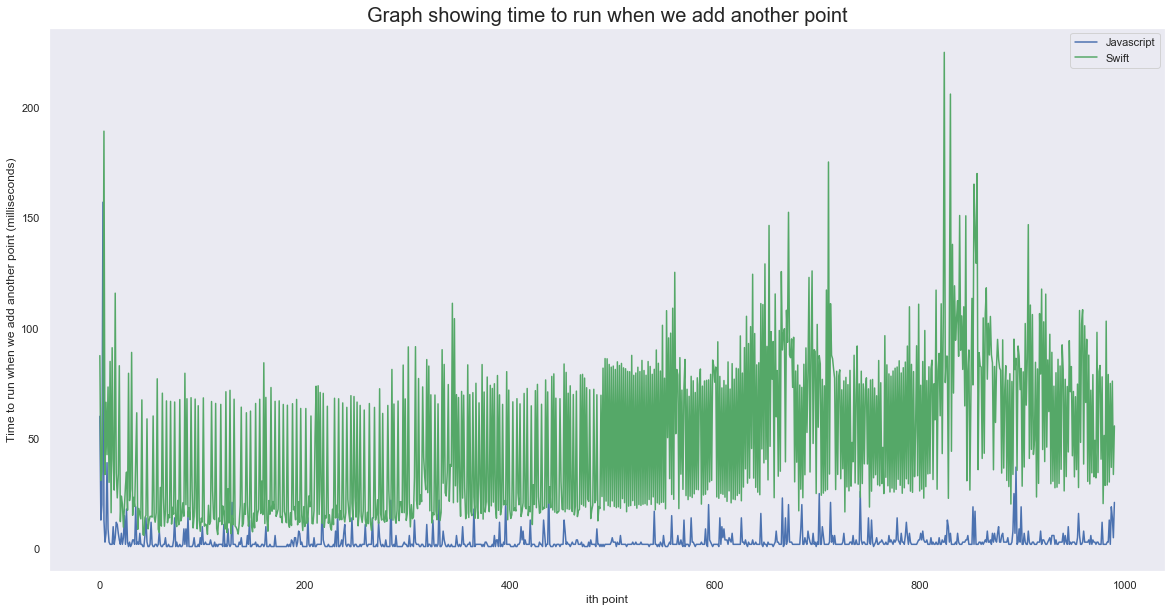

In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.set_title('Graph showing time to run when we add another point', fontsize = 20)
ax.grid()
ax.set(xlabel = 'ith point', ylabel = 'Time to run when we add another point (milliseconds)')
ax.plot(javascript.index.values, javascript['Time'], label = "Javascript", color = 'b')
ax.plot(swift.index.values, swift['Time'], label = "Swift", color = 'g')
ax.legend()
plt.show()

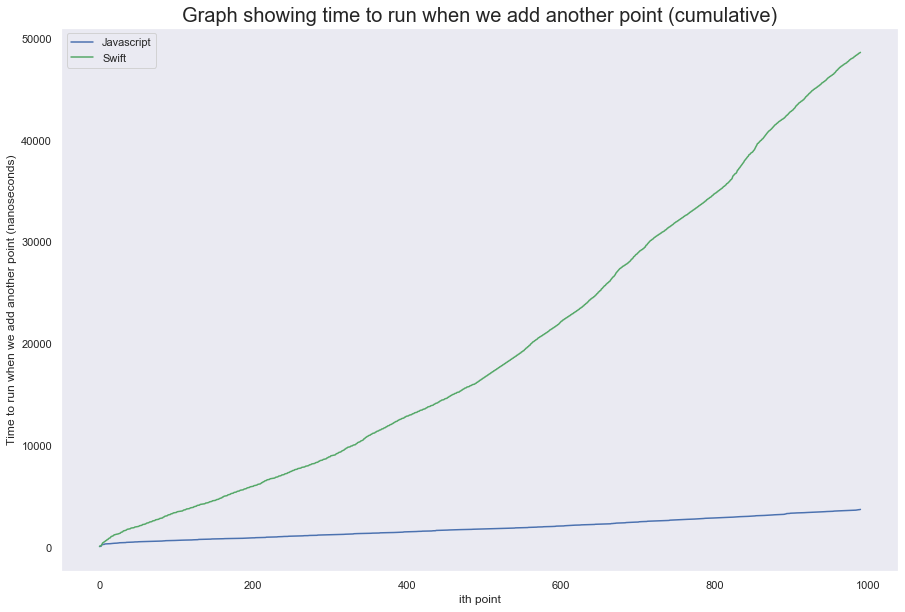

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.set_title('Graph showing time to run when we add another point (cumulative)', fontsize = 20)
ax.grid()
ax.set(xlabel = 'ith point', ylabel = 'Time to run when we add another point (nanoseconds)')
ax.plot(javascript.index.values, javascript['Cumulative'], label = "Javascript", color = 'b')
ax.plot(swift.index.values, swift['Cumulative'], label = "Swift", color = 'g')
ax.legend()
plt.show()

In [7]:
# this is the length of the jsonified automerge document in chars, 
# it's cumulative and each element is the document with one extra point. 
# it looks pretty linear but you can see you add around 20 extra chars for each point.

automerge_length = pd.read_csv("opt-automerge.txt", header = None)

automerge = automerge_length.transpose()
automerge = automerge.rename(columns = {0 : 'Length'})

automerge.head()

,Length
0,148
1,164
2,180
3,196
4,212


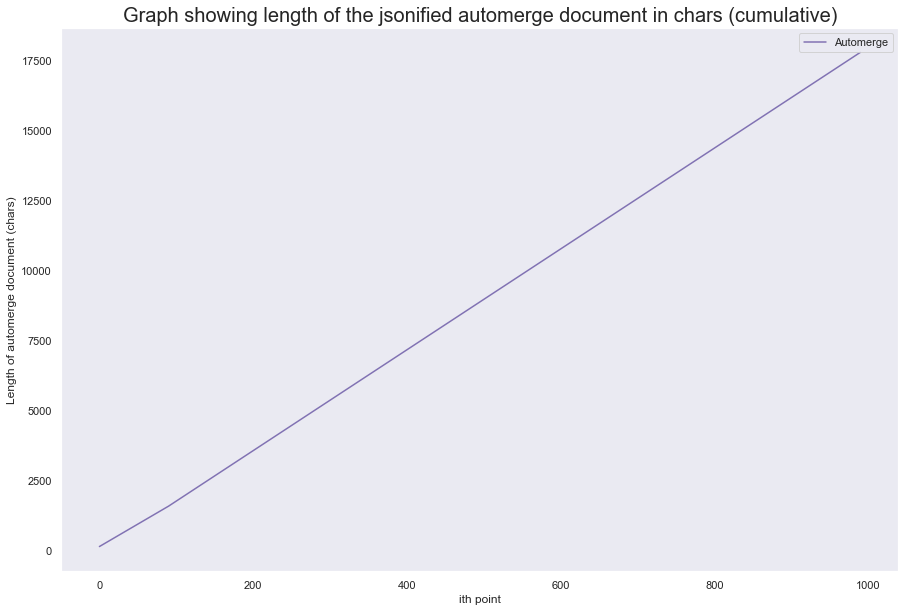

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.set_title('Graph showing length of the jsonified automerge document in chars (cumulative)', fontsize = 20)
ax.grid()
ax.set(xlabel = 'ith point', ylabel = 'Length of automerge document (chars)')
ax.plot(automerge.index.values, automerge['Length'], label = "Automerge", color = 'm')
ax.legend()
plt.show()

## YJS

In [11]:
swift_times_yjs = pd.read_csv("opt-swift-yjs.txt", header = None)

# these values are time for swift to run in nanoseconds when we add another point. 
# so the first element is the time taken to add the first point and the last element 
# is the time to add the 1000th point. it's not cumulative.

swift = swift_times_yjs.transpose()
swift = swift.rename(columns = {0 : 'Time'})

# Convert to milliseconds to match other file
conversion = 0.0000010
swift['Time'] = swift['Time'].apply(lambda x: x * conversion)

def accumulate(df):
    cumulative = np.zeros(df.count())
    summed = 0
    for (index, row) in df.iterrows():
        summed += df.iloc[index]['Time']
        cumulative[index] = summed
    return cumulative
        
summed = accumulate(swift)
swift['Cumulative'] = summed

swift.head()

,Time,Cumulative
0,61.448359,61.448359
1,35.093412,96.541771
2,46.615267,143.157038
3,57.875987,201.033025
4,83.068658,284.101683


In [12]:
js_times_yjs = pd.read_csv("opt-js-yjs.txt", header = None)

# these values are time for javascript to run in Milliseconds when we add another point. 
# so the first element is the time taken to add the first point and the last element is the time 
# to add the 1000th point. it's not cumulative.           

javascript = js_times_yjs.transpose()
javascript = javascript.rename(columns = {0 : 'Time'})

summed = accumulate(javascript)
javascript['Cumulative'] = summed

javascript.head()

,Time,Cumulative
0,6,6.0
1,3,9.0
2,2,11.0
3,4,15.0
4,6,21.0


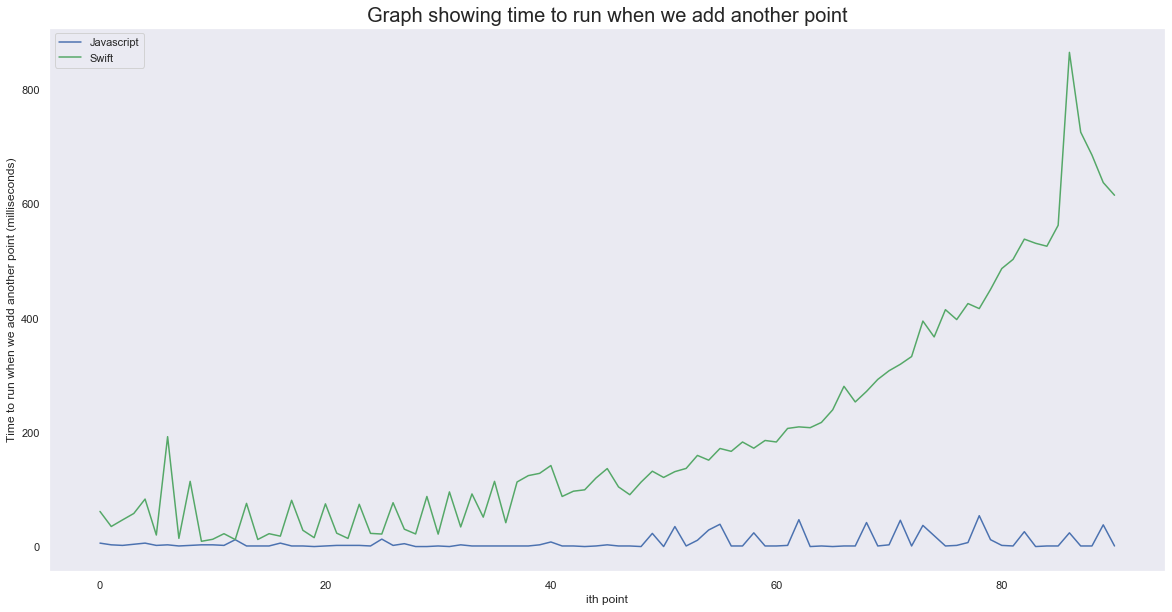

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.set_title('Graph showing time to run when we add another point', fontsize = 20)
ax.grid()
ax.set(xlabel = 'ith point', ylabel = 'Time to run when we add another point (milliseconds)')
ax.plot(javascript.index.values, javascript['Time'], label = "Javascript", color = 'b')
ax.plot(swift.index.values, swift['Time'], label = "Swift", color = 'g')
ax.legend()
plt.show()

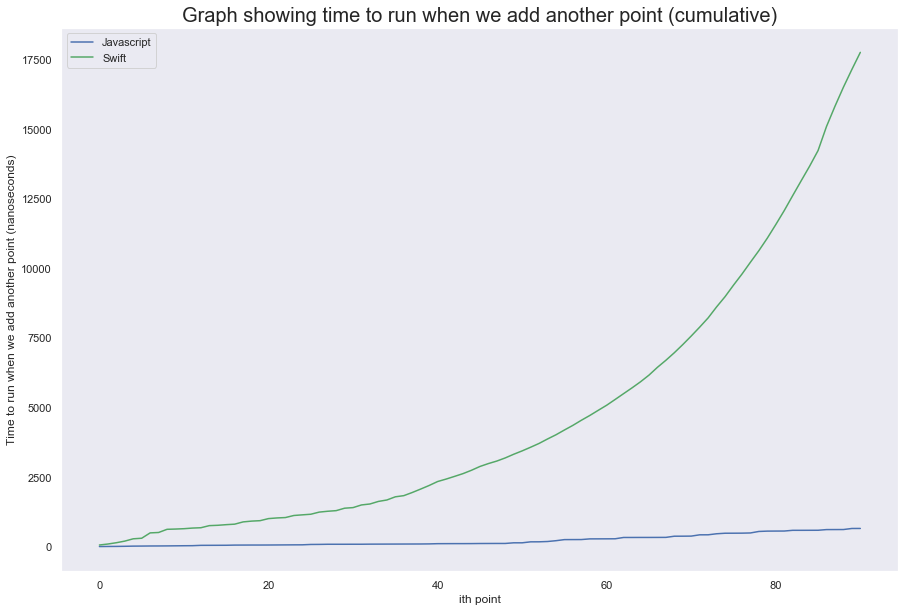

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.set_title('Graph showing time to run when we add another point (cumulative)', fontsize = 20)
ax.grid()
ax.set(xlabel = 'ith point', ylabel = 'Time to run when we add another point (nanoseconds)')
ax.plot(javascript.index.values, javascript['Cumulative'], label = "Javascript", color = 'b')
ax.plot(swift.index.values, swift['Cumulative'], label = "Swift", color = 'g')
ax.legend()
plt.show()

In [15]:
# this is the length of the jsonified automerge document in chars, 
# it's cumulative and each element is the document with one extra point. 
# it looks pretty linear but you can see you add around 20 extra chars for each point.

automerge_length = pd.read_csv("opt-yjs.txt", header = None)

automerge = automerge_length.transpose()
automerge = automerge.rename(columns = {0 : 'Length'})

automerge.head()

,Length
0,136
1,172
2,208
3,244
4,280


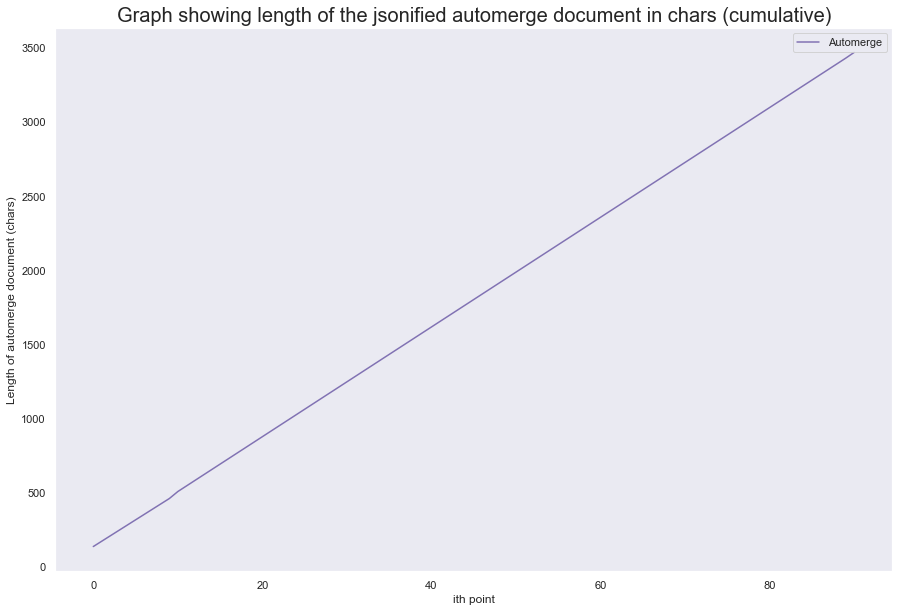

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.set_title('Graph showing length of the jsonified automerge document in chars (cumulative)', fontsize = 20)
ax.grid()
ax.set(xlabel = 'ith point', ylabel = 'Length of automerge document (chars)')
ax.plot(automerge.index.values, automerge['Length'], label = "Automerge", color = 'm')
ax.legend()
plt.show()